In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Section 3 Excercises

#Imports

In [6]:
%pip install ISLP
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [9]:
%cd /content/drive/MyDrive/My data #change directory to my drive

/content/drive/MyDrive/My data



# Excercise 8


In [11]:
Auto = pd.read_csv('Auto.csv',na_values = ['?'])
Auto = Auto.dropna()
Auto = Auto.set_index('name')

In [15]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1


In [17]:
y = pd.DataFrame(Auto['mpg'])
y

,mpg
name,
chevrolet chevelle malibu,18.0
buick skylark 320,15.0
plymouth satellite,18.0
amc rebel sst,16.0
ford torino,17.0
...,...
ford mustang gl,27.0
vw pickup,44.0
dodge rampage,32.0


In [97]:
pred = MS(['horsepower'])
X = pred.fit_transform(Auto)
model = sm.OLS(y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [49]:
new_X = pd.DataFrame({'horsepower':[98]})
new_X = pred.transform(new_X)
new_X

,intercept,horsepower
0,1.0,98


In [50]:

predicted = results.get_prediction(new_X)
predicted.predicted_mean

array([24.46707715])

In [51]:
predicted.conf_int(alpha = 0.05)


array([[23.97307896, 24.96107534]])

In [52]:
predicted.conf_int(obs = True, alpha = 0.05)

array([[14.80939607, 34.12475823]])

In [54]:
def abline(ax, b, m,  *args, **kwargs):
  'Add a line with slope m and intercept b to an axis plot ax'
  xlim = ax.get_xlim()
  ylim = [m * xlim[0] + b,m * xlim[1] + b]
  ax.plot(xlim,ylim , *args, **kwargs)

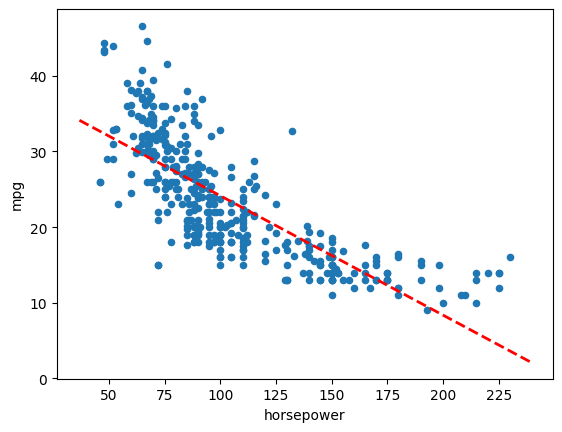

In [55]:
ax = Auto.plot.scatter('horsepower','mpg')
abline(ax,results.params[0],results.params[1], 'r--', linewidth = 2)

Text(0, 0.5, 'Residual')

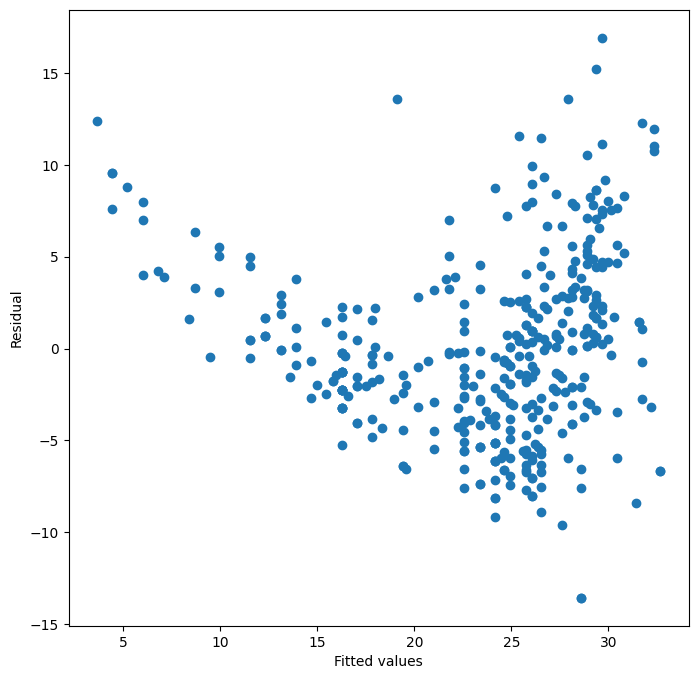

In [56]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues,results.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residual')


115

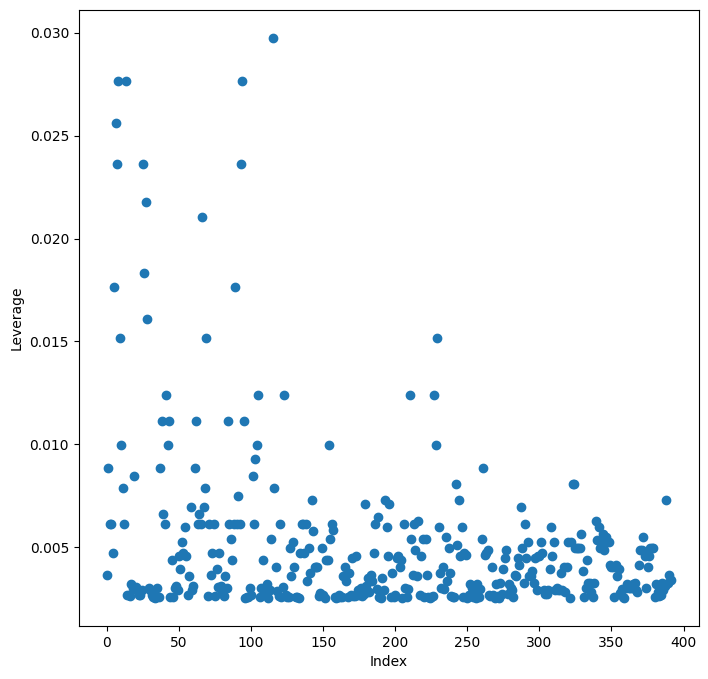

In [57]:
influence = results.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), influence.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(influence.hat_matrix_diag)

# Excercise 9

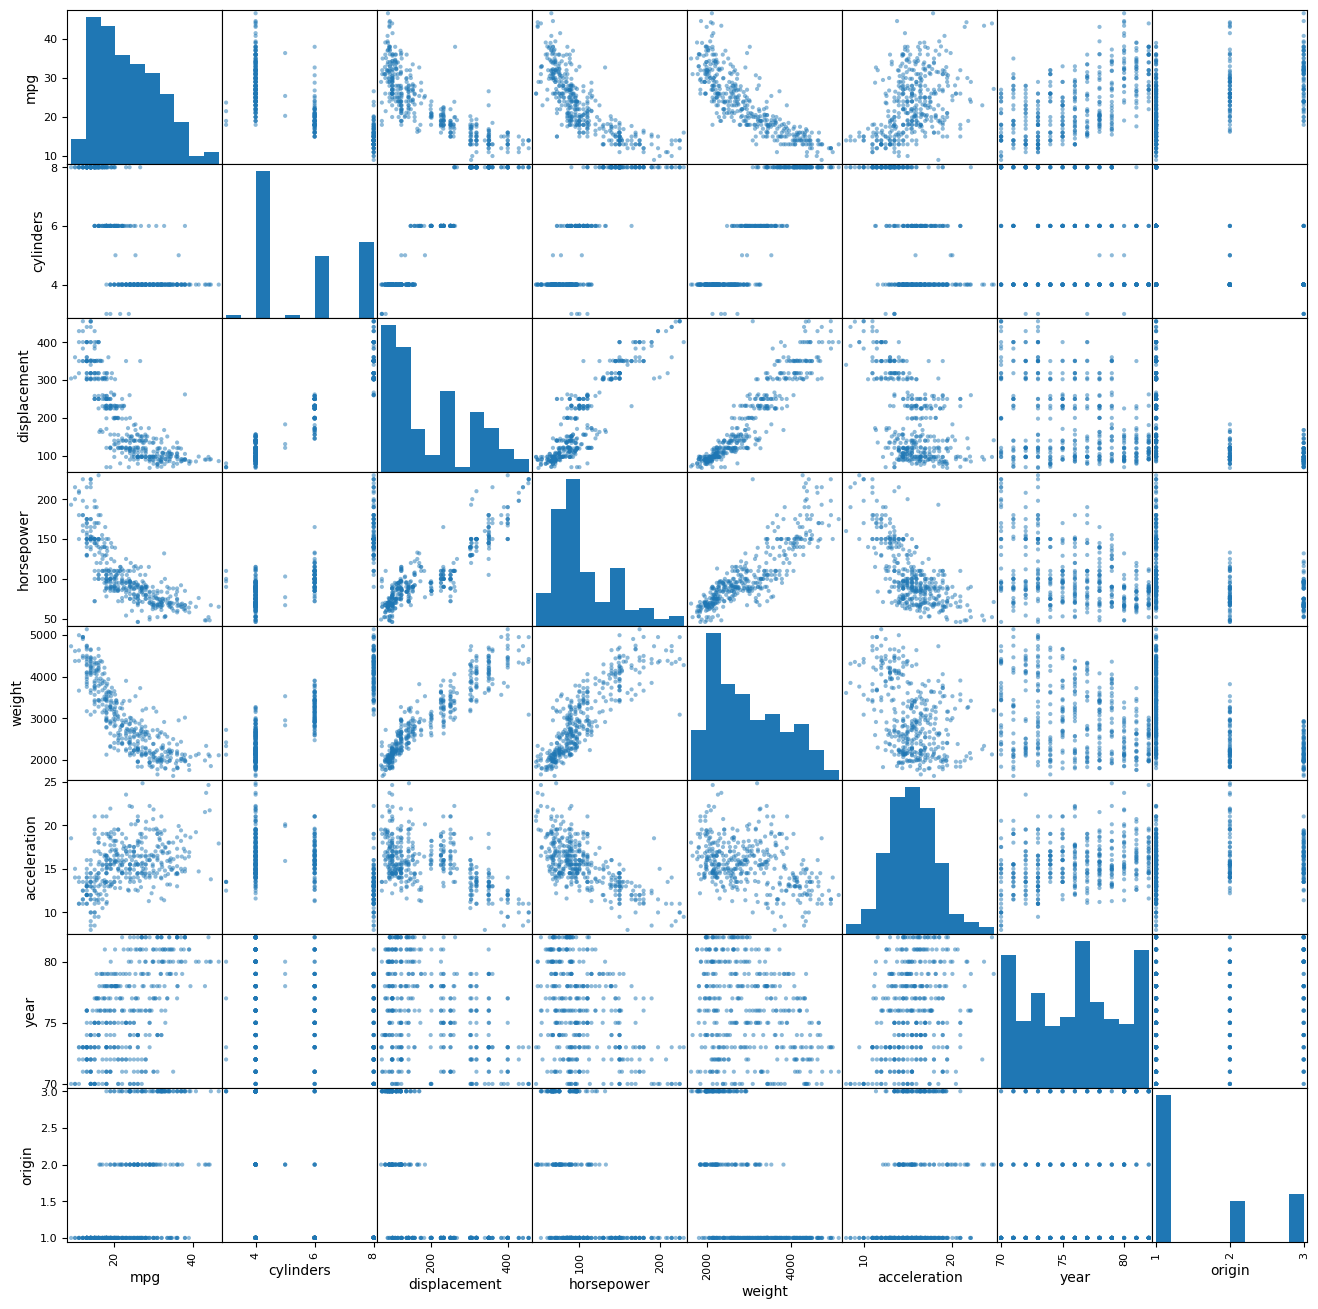

In [65]:
pd.plotting.scatter_matrix(Auto, figsize=(16,16));

In [67]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [104]:
list1 = Auto.columns.drop('mpg')
X = MS(list1).fit_transform(Auto)
model1 = sm.OLS(y,X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [106]:
anova_lm(results,results1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

Text(0, 0.5, 'Residual')

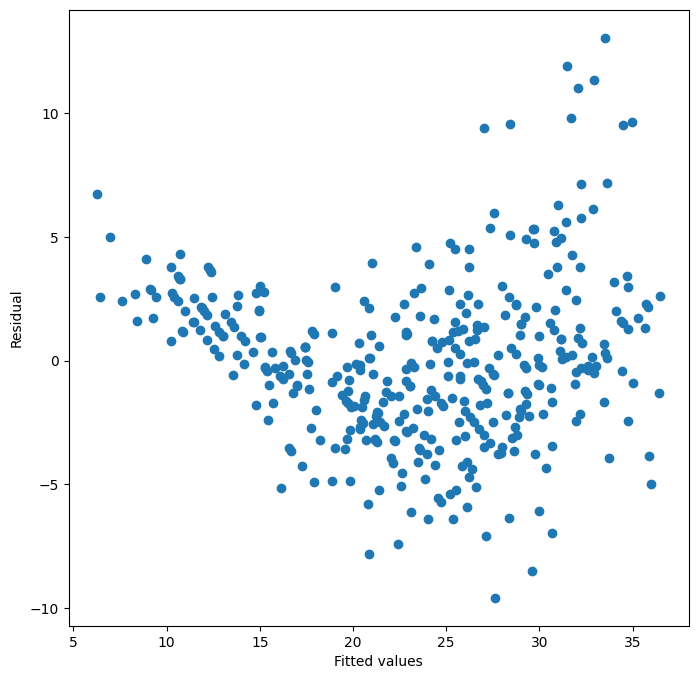

In [100]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results1.fittedvalues,results1.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residual')

13

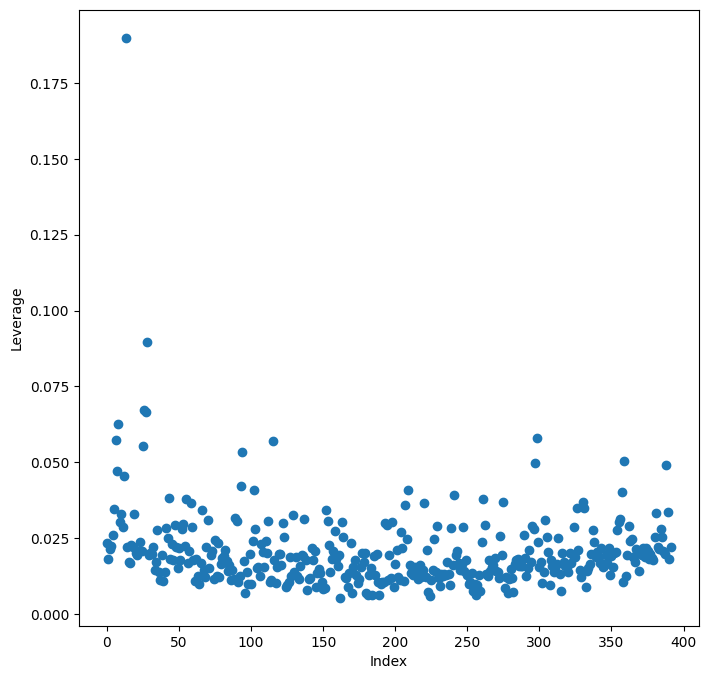

In [101]:
influence = results1.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), influence.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(influence.hat_matrix_diag)

In [115]:
X = MS(['displacement','weight','year','horsepower',('weight','displacement'),('horsepower','year')]).fit_transform(Auto)
model2 = sm.OLS(y,X)
results2 = model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,-63.74400,9.634000,-6.617,0.0
displacement,-0.06420,0.008000,-8.092,0.0
weight,-0.00930,0.001000,-14.826,0.0
year,1.57430,0.122000,12.915,0.0
horsepower,0.57990,0.089000,6.499,0.0
weight:displacement,0.00002,0.000002,9.489,0.0
horsepower:year,-0.00840,0.001000,-6.919,0.0


Text(0, 0.5, 'Residual')

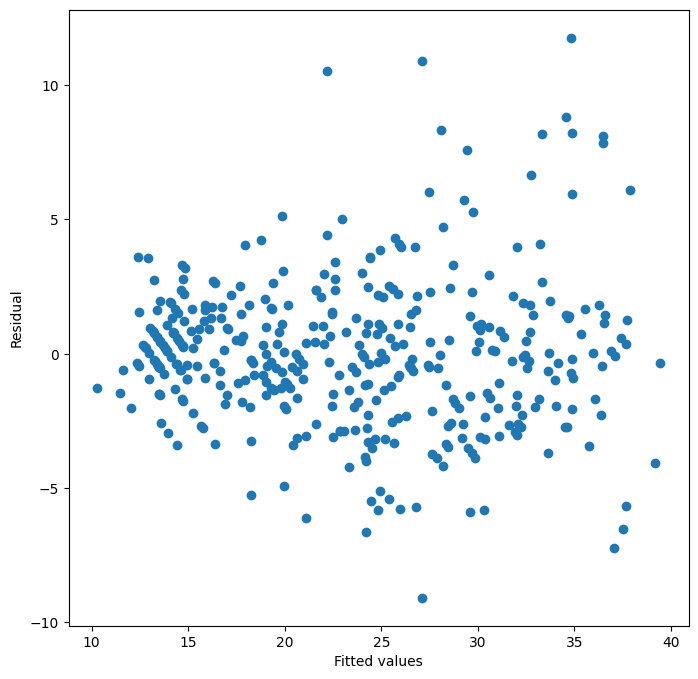

In [116]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results2.fittedvalues,results2.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residual');

In [118]:
X = MS([poly('horsepower', degree=2),'weight','year']).fit_transform(Auto)
model3 = sm.OLS(y,X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,-18.6446,3.668,-5.083,0.000
"poly(horsepower, degree=2)[0]",-23.0297,6.831,-3.371,0.001
"poly(horsepower, degree=2)[1]",30.9274,3.339,9.261,0.000
weight,-0.0051,0.000,-12.860,0.000
year,0.7543,0.047,15.974,0.000


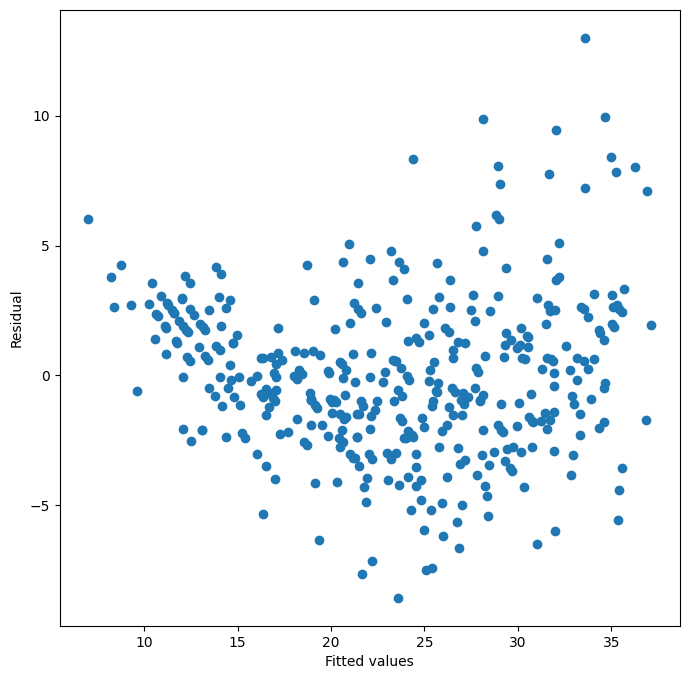

In [119]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues,results3.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residual');